# Squid Game Sentiments: Twitter's Take

### Introduction

"Squid Game," created by Hwang Dong-hyuk for Netflix, is a South Korean TV series. It follows a secretive competition where 456 financially struggling players risk their lives in deadly children's games to win a ₩45.6 billion prize. The show's title is inspired by a traditional Korean children's game.

Released worldwide on September 17, 2021, "Squid Game" received praise and gained huge popularity. It became Netflix's most-watched series and topped the charts in 94 countries. Within the first four weeks, it was watched in over 142 million households, totaling 1.65 billion viewing hours.

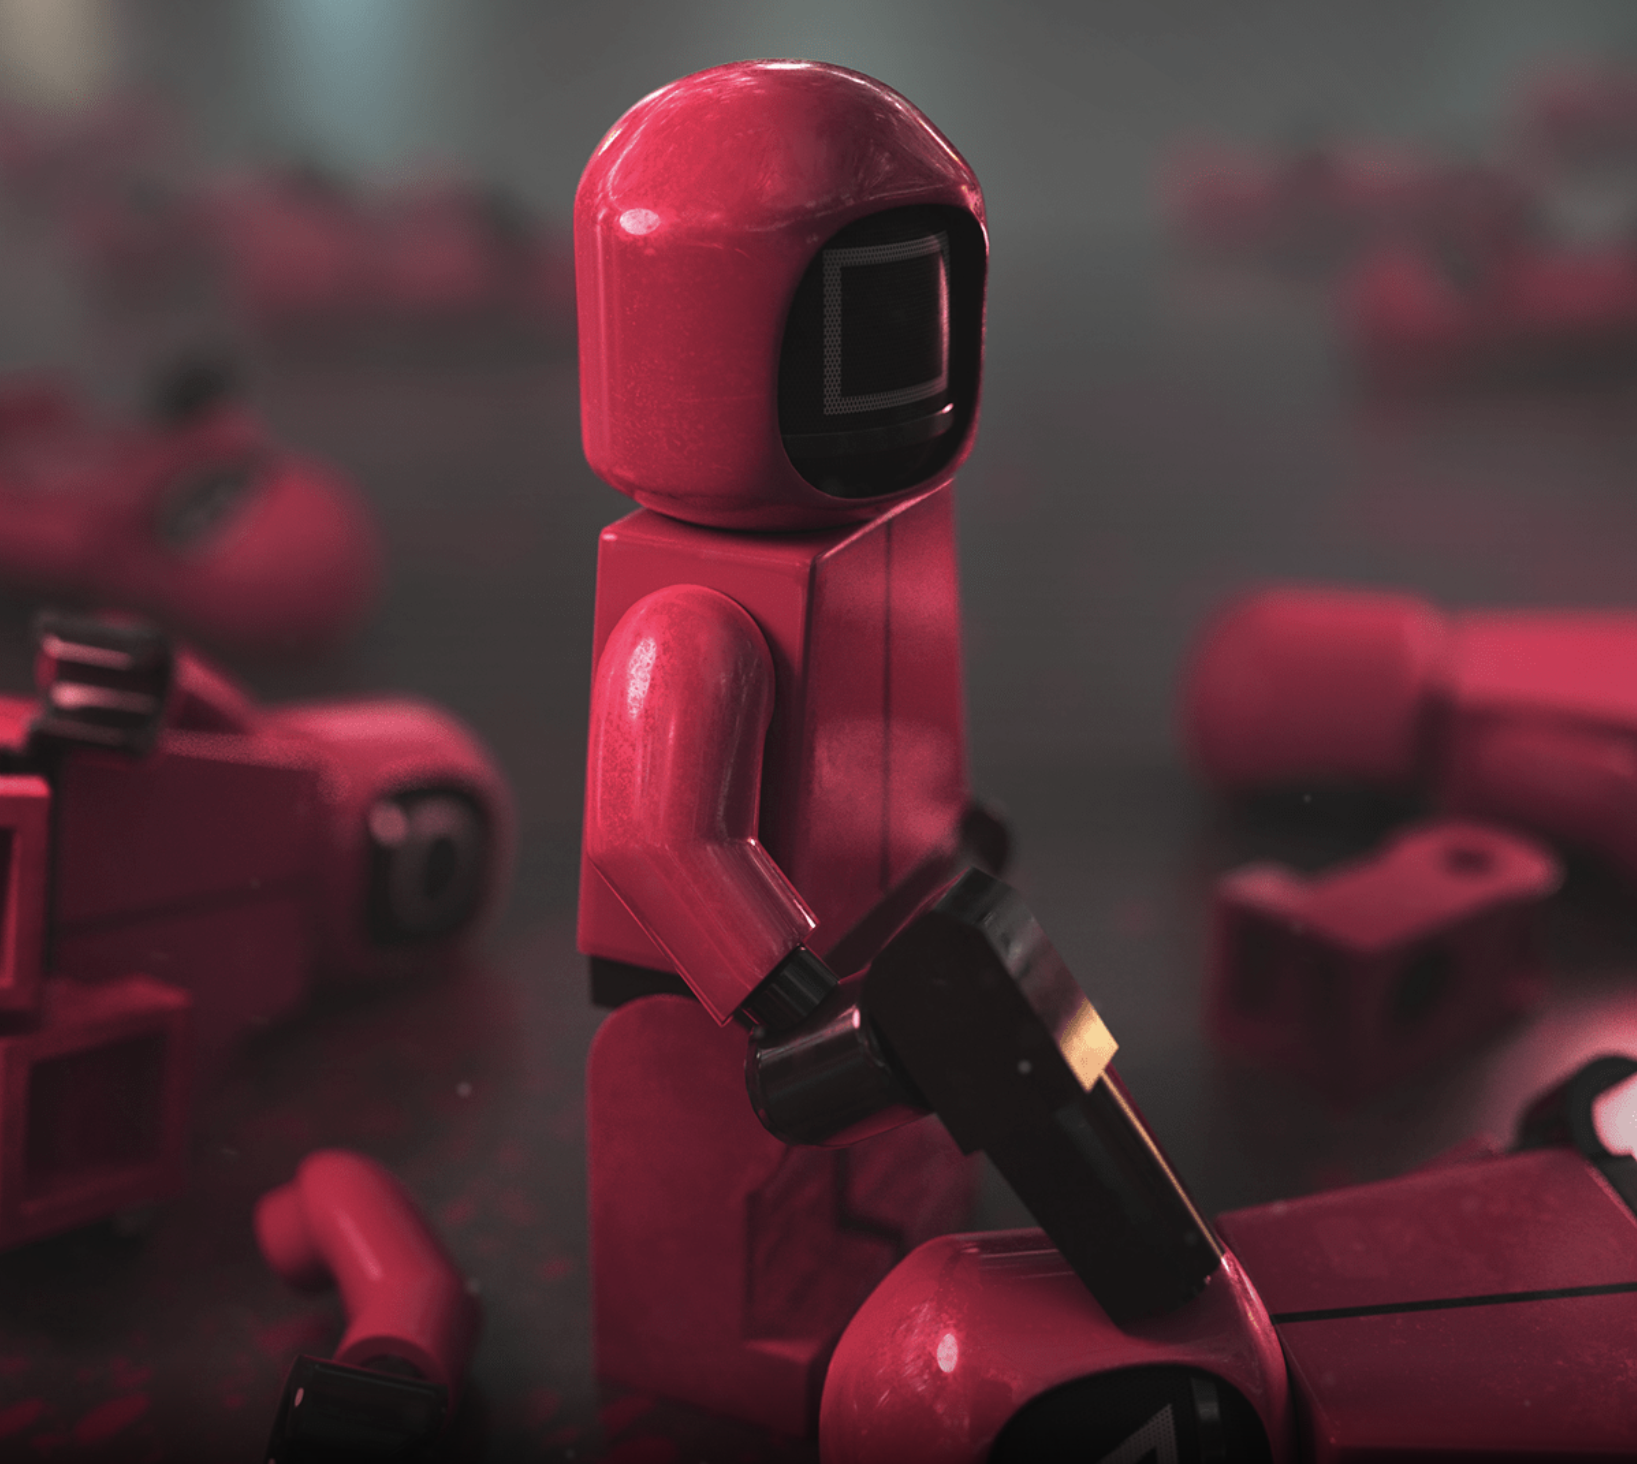

### About the Analysis

This analysis aimed to explore how Twitter users perceive of the series. I sought to identify the top hashtags associated with the show, gauge anticipation for the next series, understand viewers' sentiments, determine the locations generating the most tweets, and assess the overall conversation surrounding the Netflix series on Twitter.

### Use Case

A comprehensive analysis such as this one can be invaluable for any company with a social media presence seeking to predict customer sentiment automatically. By automating the process, companies can efficiently gauge whether their customers are satisfied or dissatisfied without the need for manual review of thousands of tweets and customer reviews. This streamlined approach enables businesses to stay proactive in addressing customer concerns and enhancing overall satisfaction levels.

### Process of Data Analysis

To extract meaningful insights from available data, a series of procedures must be undertaken. It's vital to identify and follow these procedures diligently, as each stage plays a pivotal role in ensuring that the data is processed effectively to provide actionable information. Below are the key steps I followed in this process:

1. Data Collection
2. Data Evaluation and Cleaning
3. Data Preparation
4. Sentiment Analysis
5. Data Visualization
6. Communication of Findings and Insights

### 1. Data Collection

The data collection process consisted of downloading the dataset from Kaggle, a platform that hosts datasets and data science resources. This dataset, related to the Netflix series "Squid Game," provided the necessary information for analysis, including tweets and other relevant data.

In [1]:
#Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghajotangiya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghajotangiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/meghajotangiya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/meghajotangiya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/meghajotangiya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#Import libraries
import pandas as pd 
import re 
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [3]:
df=pd.read_csv("The Squid Game Tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [4]:
#Drop columns
df.drop(columns=['user_description','user_created', 'user_followers','user_friends','user_favourites','user_verified','source','is_retweet'],inplace=True)
df.head()

,user_name,user_location,date,text
0,the _ûndër-ratèd niggáh👊🏾,NaN,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...
1,Best uncle on planet earth,NaN,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭
2,marcie,NaN,2021-10-06 12:05:22+00:00,#Squidgame time
3,YoMo.Mdp,Any pronouns,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...
4,Laura Reactions,France,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th..."


In [5]:
#Rename column names
tweets_df=df.rename(columns={'user_name':'Username','user_location':'Location','date':'Time_of_tweet','text':'Tweet'},errors="raise")
tweets_df.head()

,Username,Location,Time_of_tweet,Tweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...
1,Best uncle on planet earth,NaN,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭
2,marcie,NaN,2021-10-06 12:05:22+00:00,#Squidgame time
3,YoMo.Mdp,Any pronouns,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...
4,Laura Reactions,France,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th..."


### 2. Data Evaluation and Cleaning

In [6]:
#Check for duplicate users
tweets_df.duplicated(subset='Username').sum()

25385

In [7]:
#Remove duplicate users
tweets_df.drop_duplicates(subset=['Username'],inplace=True)

In [8]:
#filling missing locations with "No location"
tweets_df["Location"]=tweets_df["Location"].fillna('No location')
tweets_df['Location'].value_counts()

No location              16326
Los Angeles, CA            591
London, England            498
United States              478
India                      439
                         ...  
Chico, CA                    1
Wherever the news is         1
NorCal for Life!!!!!         1
Felida, WA                   1
Murcia Spain                 1
Name: Location, Length: 17677, dtype: int64

In [9]:
#Check for missing values
tweets_df.isnull().value_counts()

Username  Location  Time_of_tweet  Tweet
False     False     False          False    54633
True      False     False          False        1
dtype: int64

In [10]:
#Remove missing value from 'Username'
tweets_df.dropna(subset=['Username'], inplace=True)

In [11]:
tweets_df.shape

(54633, 4)

### 3. Data Preparation

In [12]:
# Function to remove stickers from the string
def remove_stickers(text):
    sticker_emoji_pattern = re.compile("["
                                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                       u"\U0001F600-\U0001F64F"  # emoticons
                                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                       u"\U0001F700-\U0001F77F"  # alchemical symbols
                                       u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                       u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                       u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                       u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                       u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                       u"\U00002702-\U000027B0"
                                       u"\U000024C2-\U0001F251"
                                       "]+", flags=re.UNICODE)
    return sticker_emoji_pattern.sub('', text)

# Convert "Location" column to string datatype if necessary
tweets_df['Location'] = tweets_df['Location'].astype(str)

# Remove flag emojis from the "Location" column
tweets_df['Location']=tweets_df['Location'].apply(remove_stickers)
tweets_df

,Username,Location,Time_of_tweet,Tweet
0,the _ûndër-ratèd niggáh👊🏾,No location,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...
1,Best uncle on planet earth,No location,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭
2,marcie,No location,2021-10-06 12:05:22+00:00,#Squidgame time
3,YoMo.Mdp,Any pronouns,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...
4,Laura Reactions,France,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th..."
...,...,...,...,...
80008,Lee Grears,"Whitehaven, England",2021-10-28 13:47:18+00:00,#SquidGame anyone?\n\nhttps://t.co/zuOktSAILr
80011,Chloe.C,No location,2021-10-28 13:46:41+00:00,Amazing drama I have watched these days. The c...
80012,EUhistory 🩸,No location,2021-10-28 13:46:39+00:00,What sort of parent let's their child watch #S...
80013,Spanish News Today,Murcia Spain,2021-10-28 13:46:27+00:00,Eeagle-eyed viewers of the #SquidGame have com...


In [13]:
#Define function to extract hashtags and remove # with REGEX
def getHashtags(tweet):
    tweet = tweet.lower()  
    tweet = re.findall(r'\#\w+',tweet) 
    return " ".join(tweet)

tweets_df['Hashtags'] = tweets_df['Tweet'].apply(getHashtags)
tweets_df.head()

,Username,Location,Time_of_tweet,Tweet,Hashtags
0,the _ûndër-ratèd niggáh👊🏾,No location,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,#squidgame #netflix
1,Best uncle on planet earth,No location,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,#squidgame
2,marcie,No location,2021-10-06 12:05:22+00:00,#Squidgame time,#squidgame
3,YoMo.Mdp,Any pronouns,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,#squidgame
4,Laura Reactions,France,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",


In [34]:
hashtags_list = tweets_df['Hashtags'].tolist()

In [15]:
# Iterate over all hashtags and split where there is more than one hashtag
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

In [16]:
# Determine Unique count of all hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)

# Check for top 10 hashtags
hashtags_df.head()

,Hashtags,Count
0,#squidgame,45026
1,#netflix,2047
16,#squidgamenetflix,1909
5,#squidgames,1097
76,#squidgamefanart,981


In [17]:
hashtags_df.to_csv("Hashtag_Data.csv", index=False)

In [18]:
# Define the list of episode names
episode_names = [
    'Red Light, Green Light',
    'Hell',
    'The Man With the Umbrella',
    'Stick to the Team',
    'A Fair World',
    'Gganbu',
    'VIPs',
    'Front Man',
    'One Lucky Day'
]

# Function to search for episode references in tweets
def find_episode_mentions(tweet):
    mentions = []
    for episode_name in episode_names:
        if episode_name.lower() in tweet.lower():
            mentions.append(episode_name)
    return mentions

# Apply the function to the 'Tweet' column
tweets_df['Episode_Mentions'] = tweets_df['Tweet'].apply(find_episode_mentions)

# Modify the output formatting
def format_episode_mentions(mentions):
    if mentions:
        return ', '.join(mentions)
    else:
        return None

# Apply the formatting function to the 'Episode_Mentions' column
tweets_df['Episode_Mentions'] = tweets_df['Episode_Mentions'].apply(format_episode_mentions)


# Display the DataFrame with episode mentions
tweets_df['Episode_Mentions'].value_counts()

Hell                                                       397
Red Light, Green Light                                     314
Gganbu                                                     194
VIPs                                                       148
Front Man                                                  138
A Fair World                                                 8
One Lucky Day                                                7
The Man With the Umbrella                                    7
Hell, VIPs                                                   3
Stick to the Team                                            3
VIPs, Front Man                                              2
Red Light, Green Light, Hell                                 2
Red Light, Green Light, Gganbu                               2
Red Light, Green Light, Hell, The Man With the Umbrella      1
Hell, Gganbu                                                 1
Red Light, Green Light, Stick to the Team, Gganbu      

In [19]:
tweets_df[60:90].head(30)

,Username,Location,Time_of_tweet,Tweet,Hashtags,Episode_Mentions
60,🌊🌊Becca Ashley McGowan🌊 🌊 (They/Her),"Connecticut, USA",2021-10-06 11:55:47+00:00,Really @hodakotb ? Your remarks on Today about...,#squidgame,None
61,Paul Woodthorpe,United Kingdom,2021-10-06 11:55:43+00:00,Serious question. What colour are the #SquidGa...,#squidgame,None
62,King David Tobi,"Lagos, Nigeria",2021-10-06 11:55:41+00:00,"Different Shows, Same Energy 🌈\n#AliceInBorder...",#aliceinborderland #squidgame,None
63,MyWallSt,Dublin/New York,2021-10-06 11:55:37+00:00,$NFLX shares soared 5.2% yesterday after inves...,#squidgame,None
64,circdusoleil,"Jakarta Selatan, DKI Jakarta",2021-10-06 11:55:35+00:00,When you’re having a meeting and #googlemet ap...,#googlemet #squidgame #오징어게임 #viral #wfh #meeting,None
65,Kels from up the street ❤️‍🔥,"Fort Worth, TX",2021-10-06 11:55:25+00:00,I still haven’t finished #SquidGame,#squidgame,None
66,Ramin Omrani,Italia,2021-10-06 11:55:13+00:00,#squidgame reminds me of job interviews.,#squidgame,None
67,JustSomeGoth,"England, United Kingdom",2021-10-06 11:55:03+00:00,SQUIDGAME CHIBI YCH OPEN!\nUnshaded - £20\nSha...,,None
68,iDiski Times,South Africa,2021-10-06 11:55:00+00:00,"So Kaizer Chiefs and Orlando Pirates fans, who...",#squidgame,None
69,Fãs de Keanu Reeves,Brasil,2021-10-06 11:54:47+00:00,This is '#SquidGame' would look if it starred ...,#squidgame #keanureeves #bradpitt #zendaya,None


In [20]:
tweets_df.dtypes

Username            object
Location            object
Time_of_tweet       object
Tweet               object
Hashtags            object
Episode_Mentions    object
dtype: object

In [21]:
# Change Time_of_tweet column into datetime format
tweets_df['Time_of_tweet']=pd.to_datetime(tweets_df['Time_of_tweet'])

In [22]:
tweets_df.dtypes

Username                         object
Location                         object
Time_of_tweet       datetime64[ns, UTC]
Tweet                            object
Hashtags                         object
Episode_Mentions                 object
dtype: object

In [23]:
# Split 'Time_of_tweet' column into separate 'Date' and 'Time' columns
tweets_df['Date'] = tweets_df['Time_of_tweet'].dt.date
tweets_df['Time'] = tweets_df['Time_of_tweet'].dt.time
tweets_df.drop('Time_of_tweet', axis=1, inplace=True)
tweets_df.head()

,Username,Location,Tweet,Hashtags,Episode_Mentions,Date,Time
0,the _ûndër-ratèd niggáh👊🏾,No location,When life hits and the same time poverty strik...,#squidgame #netflix,None,2021-10-06,12:05:38
1,Best uncle on planet earth,No location,That marble episode of #SquidGame ruined me. 😭😭😭,#squidgame,None,2021-10-06,12:05:22
2,marcie,No location,#Squidgame time,#squidgame,None,2021-10-06,12:05:22
3,YoMo.Mdp,Any pronouns,//Blood on 1st slide\nI'm joining the squidgam...,#squidgame,None,2021-10-06,12:05:04
4,Laura Reactions,France,"The two first games, players were killed by th...",,None,2021-10-06,12:05:00


In [24]:
# Extract hour, minute, and second
tweets_df['Hour'] = tweets_df['Time'].apply(lambda x: x.hour)
tweets_df['Minute'] = tweets_df['Time'].apply(lambda x: x.minute)
tweets_df['Second'] = tweets_df['Time'].apply(lambda x: x.second)

tweets_df.head()


,Username,Location,Tweet,Hashtags,Episode_Mentions,Date,Time,Hour,Minute,Second
0,the _ûndër-ratèd niggáh👊🏾,No location,When life hits and the same time poverty strik...,#squidgame #netflix,None,2021-10-06,12:05:38,12,5,38
1,Best uncle on planet earth,No location,That marble episode of #SquidGame ruined me. 😭😭😭,#squidgame,None,2021-10-06,12:05:22,12,5,22
2,marcie,No location,#Squidgame time,#squidgame,None,2021-10-06,12:05:22,12,5,22
3,YoMo.Mdp,Any pronouns,//Blood on 1st slide\nI'm joining the squidgam...,#squidgame,None,2021-10-06,12:05:04,12,5,4
4,Laura Reactions,France,"The two first games, players were killed by th...",,None,2021-10-06,12:05:00,12,5,0


In [25]:
pd.set_option('display.max_colwidth', None)

tweets_df['Tweet']

0                     When life hits and the same time poverty strikes you\nGong Yoo : Lets play a game \n#SquidGame #Netflix https://t.co/Cx7ifmZ8cN
1                                                                                                   That marble episode of #SquidGame  ruined me. 😭😭😭
2                                                                                                                                     #Squidgame time
3               //Blood on 1st slide\nI'm joining the squidgame thing, I'm already dead by sugar honeycomb ofc\n\n#SquidGame… https://t.co/N4UGv9hxx8
4        The two first games, players were killed by the mask guys ; the bloody night and the third game, they killed each o… https://t.co/Qf057XDJ7C
                                                                             ...                                                                     
80008                                                                                               

In [26]:
#Preprocess tweet for sentiment analysis
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_tweet(tweet):
    # Lowercasing
    tweet = tweet.lower()

    # Removing URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Removing user handles
    tweet = re.sub(r'@[^\s]+', '', tweet)

    # Tokenization
    tokens = nltk.word_tokenize(tweet)

    # Removing punctuation and numbers, and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

    # Joining tokens back into a string
    processed_tweet = ' '.join(tokens)

    return processed_tweet

# Apply preprocessing to the 'Tweet' column
tweets_df['Processed_tweet'] = tweets_df['Tweet'].apply(preprocess_tweet)

# Display the DataFrame with processed tweets
pd.set_option('display.max_colwidth', None)
tweets_df['Processed_tweet']


0        life hit time poverty strike gong yoo let play game squidgame netflix
1                                                marble episode squidgame ruin
2                                                               squidgame time
3                  slide join squidgame thing already dead sugar honeycomb ofc
4             two first game player kill mask guy bloody night third game kill
                                         ...                                  
80008                                                         squidgame anyone
80011     amaze drama watch day cinematography amaze really love one squidgame
80012                                    sort parent let child watch squidgame
80013               viewer squidgame come together online suggest famous stair
80015       squid game review revaaa squidgame review anything anyone anywhere
Name: Processed_tweet, Length: 54633, dtype: object

In [27]:
# Define a list of keywords or phrases related to anticipation for season 2
season2_keywords = ['season 2', 'season two', 's2']

# Function to search for season 2 anticipation mentions in tweets
def find_season2_mentions(tweet):
    for keyword in season2_keywords:
        if keyword.lower() in tweet.lower():
            return True
    return False

# Apply the function to the 'Tweet' column to identify tweets mentioning anticipation for season 2
tweets_df['Season2_Mentions'] = tweets_df['Tweet'].apply(find_season2_mentions)

# Count the number of tweets mentioning anticipation for season 2
num_season2_mentions = tweets_df['Season2_Mentions'].sum()

# Display the number of tweets mentioning anticipation for season 2
print("Number of tweets mentioning anticipation for Season 2:", num_season2_mentions)


Number of tweets mentioning anticipation for Season 2: 719


### 4. Sentiment Analysis

In [28]:
import textblob
from textblob import TextBlob

# Define function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [29]:
# Apply the functions to respective columns
tweets_df['Polarity']=tweets_df['Processed_tweet'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)
tweets_df['Sentiment'].value_counts()

Neutral     20973
Positive    19025
Negative    14635
Name: Sentiment, dtype: int64

In [30]:
tweets_df

,Username,Location,Tweet,Hashtags,Episode_Mentions,Date,Time,Hour,Minute,Second,Processed_tweet,Season2_Mentions,Polarity,Sentiment
0,the _ûndër-ratèd niggáh👊🏾,No location,When life hits and the same time poverty strikes you\nGong Yoo : Lets play a game \n#SquidGame #Netflix https://t.co/Cx7ifmZ8cN,#squidgame #netflix,None,2021-10-06,12:05:38,12,5,38,life hit time poverty strike gong yoo let play game squidgame netflix,False,-0.40,Negative
1,Best uncle on planet earth,No location,That marble episode of #SquidGame ruined me. 😭😭😭,#squidgame,None,2021-10-06,12:05:22,12,5,22,marble episode squidgame ruin,False,0.00,Neutral
2,marcie,No location,#Squidgame time,#squidgame,None,2021-10-06,12:05:22,12,5,22,squidgame time,False,0.00,Neutral
3,YoMo.Mdp,Any pronouns,"//Blood on 1st slide\nI'm joining the squidgame thing, I'm already dead by sugar honeycomb ofc\n\n#SquidGame… https://t.co/N4UGv9hxx8",#squidgame,None,2021-10-06,12:05:04,12,5,4,slide join squidgame thing already dead sugar honeycomb ofc,False,-0.20,Negative
4,Laura Reactions,France,"The two first games, players were killed by the mask guys ; the bloody night and the third game, they killed each o… https://t.co/Qf057XDJ7C",,None,2021-10-06,12:05:00,12,5,0,two first game player kill mask guy bloody night third game kill,False,-0.27,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80008,Lee Grears,"Whitehaven, England",#SquidGame anyone?\n\nhttps://t.co/zuOktSAILr,#squidgame,None,2021-10-28,13:47:18,13,47,18,squidgame anyone,False,0.00,Neutral
80011,Chloe.C,No location,"Amazing drama I have watched these days. The cinematography was amazing, I really love this one\nAfter #SquidGame ,… https://t.co/s5c2qC2hTE",#squidgame,None,2021-10-28,13:46:41,13,46,41,amaze drama watch day cinematography amaze really love one squidgame,False,0.50,Positive
80012,EUhistory 🩸,No location,What sort of parent let's their child watch #SquidGame ? \n\nhttps://t.co/Fbyup0vAxO,#squidgame,None,2021-10-28,13:46:39,13,46,39,sort parent let child watch squidgame,False,0.00,Neutral
80013,Spanish News Today,Murcia Spain,Eeagle-eyed viewers of the #SquidGame have come together online to suggest that the famous multi-coloured stairs wh… https://t.co/luddA9W3Io,#squidgame,None,2021-10-28,13:46:27,13,46,27,viewer squidgame come together online suggest famous stair,False,0.50,Positive


### 6. Data Visualization

In [31]:
tweets_df.to_csv("Squid_Game_Final_File.csv", index=False)

I exported the finalized CSV file to PowerBI, where I created a dashboard to visually represent my analysis more effectively.